# ML innlevering 2 - TMDB Box Office Prediction

DET VI SKAL PREDICTE ER REVENUE PÅ HVER AV ID-ENE ("try and predict their overall worldwide box office revenue")

During this project we will use the eight steps in Appendix B:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

# Getting started

#### Get the data:

In [1664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [1665]:
#lists the files in the folder
import os
print(os.listdir("data"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [1666]:
#Reads in the csv-files and creates a dataframe using pandas

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sampleSubmission = pd.read_csv('data/sample_submission.csv')

## Explore the data

In [1667]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [1668]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

Info gives a clean list of all the features in the train set. Most of the features are objects, except a few which are ints or floats. Info also contains info about the Non-Null numbers. Some features contains a smaller amount of Non-Null numbers, whoch means there are missing data. The column "belongs_to_collection" have a very small Non-Null so the feature probably have a lot of missing data. Lets go deeper:

The code underneath provides an overview of missing values in train. The missing values makes it harder to give good predictions, if it is not handled correctly.

In [1669]:
print(train.isnull().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


Text(0.5, 1.0, 'Missing Value count By Features')

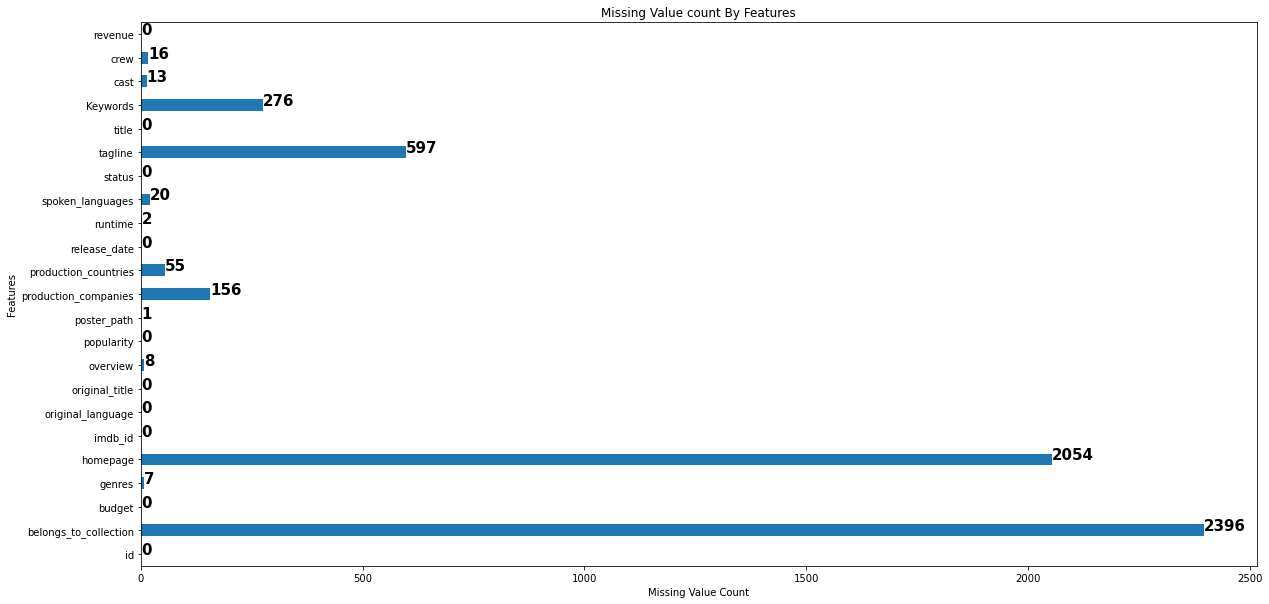

In [1670]:
train.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(train.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

Homepage are one of the features that has a lot of missing values. This feature is not seen as a important feature in order to predict revenue. Therefore this feature will be dropped. 

In this first round we are dropping all the features that has missing values, and then we will keep the necessary ones and calculate the missing values

In [1671]:
X = train.drop(['id', 'homepage', 'belongs_to_collection',
            'overview', 'poster_path','Keywords',
            'tagline','crew'],axis=1)


#train.drop(['homepage','imdb_id','belongs_to_collection',
 #           'genres','overview','production_companies',
  #          'production_countries','poster_path','spoken_languages',
   #         'tagline','Keywords','crew','cast'],axis=1)

Underneath is a code written to fill all "nan"´s with zeros. This is done, because the movies with nan in the feature "belongs_to_collection" most likely des not belong to any collection.

In [1672]:
#X['belongs_to_collection'] = X['belongs_to_collection'].fillna(0)
#X['genres'] = X['genres'].fillna(0)
#X['production_companies'] = X['production_companies'].fillna(0)
#X['production_countries'] = X['production_countries'].fillna(0)
#X['runtime'] = X['runtime'].fillna(0)
#X['spoken_languages'] = X['spoken_languages'].fillna(0)
#X['Keywords'] = X['Keywords'].fillna(0)
#X['cast'] = X['cast'].fillna(0)

In [1673]:
X.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970


In [1674]:
#for i, e in enumerate(train['belongs_to_collection'][:5]):
  #  print(i, e)

In [1675]:
X_test = test.drop("id", axis=1)
X_test.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [1676]:
#train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

### Lets also understand the popularity of the genres

In [1677]:
#for i, e in enumerate(train['genres'][:5]):
   # print(i, e)

In [1678]:
#print('Number of genres in films')
#train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

In [1679]:
#list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [1680]:
#plt.figure(figsize = (12, 8))
#text = ' '.join([i for j in list_of_genres for i in j])
#wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      #width=1200, height=1000).generate(text)
#plt.imshow(wordcloud)
#plt.title('Top genres')
#plt.axis("off")
#plt.show()
# laga ett tankekart på en måte, der modellen framheva dei mest populære sjangrane. 
# Vil ikkje kjøre pga mangla list_of_genres fra kodelinja over.

In [1681]:
X.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


If std had been 1 and mean hade been 0, it would have been a perfect result already

### Release of movies

In [1682]:
#Since only last two digits of year are provided, this is the correct way of getting the year.
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek

Get Month, Day, Year and week day from release date

In [1683]:
import seaborn as sns

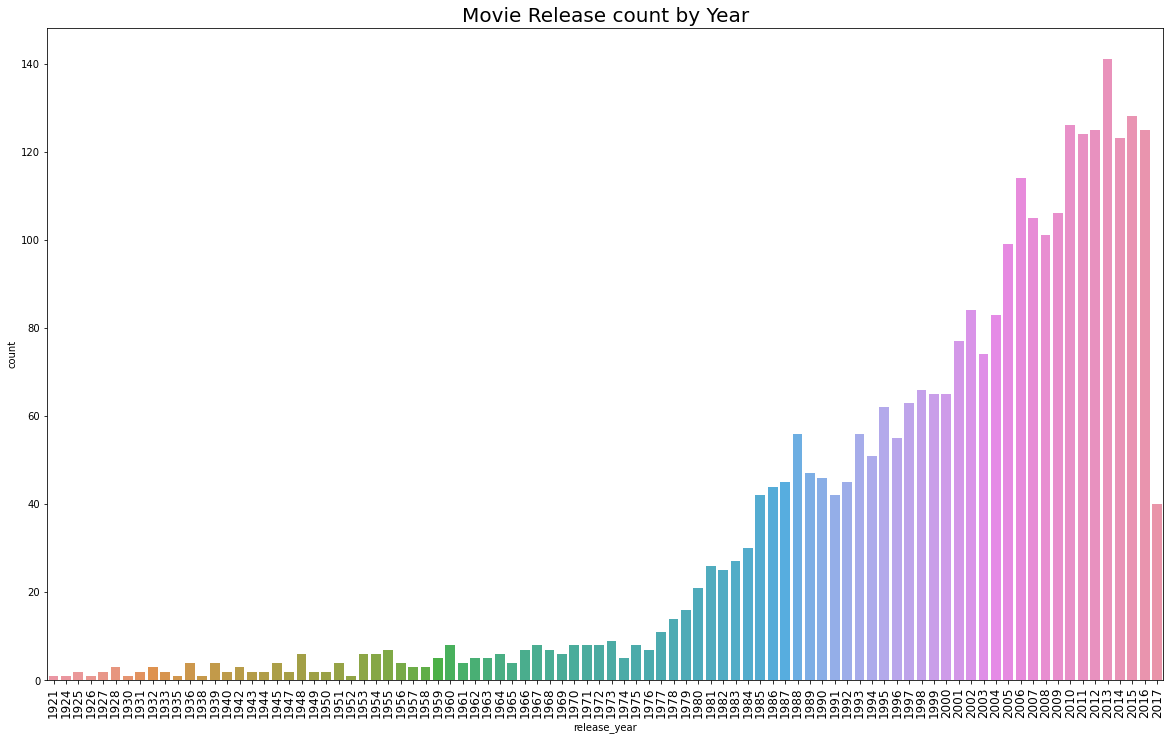

In [1684]:
plt.figure(figsize = (20, 12))
sns.countplot(train['release_year'].sort_values())
plt.title("Movie Release count by Year", fontsize = 20)
loc, labels = plt.xticks()
plt.xticks(fontsize = 12, rotation = 90)
plt.show()

A plot of release year

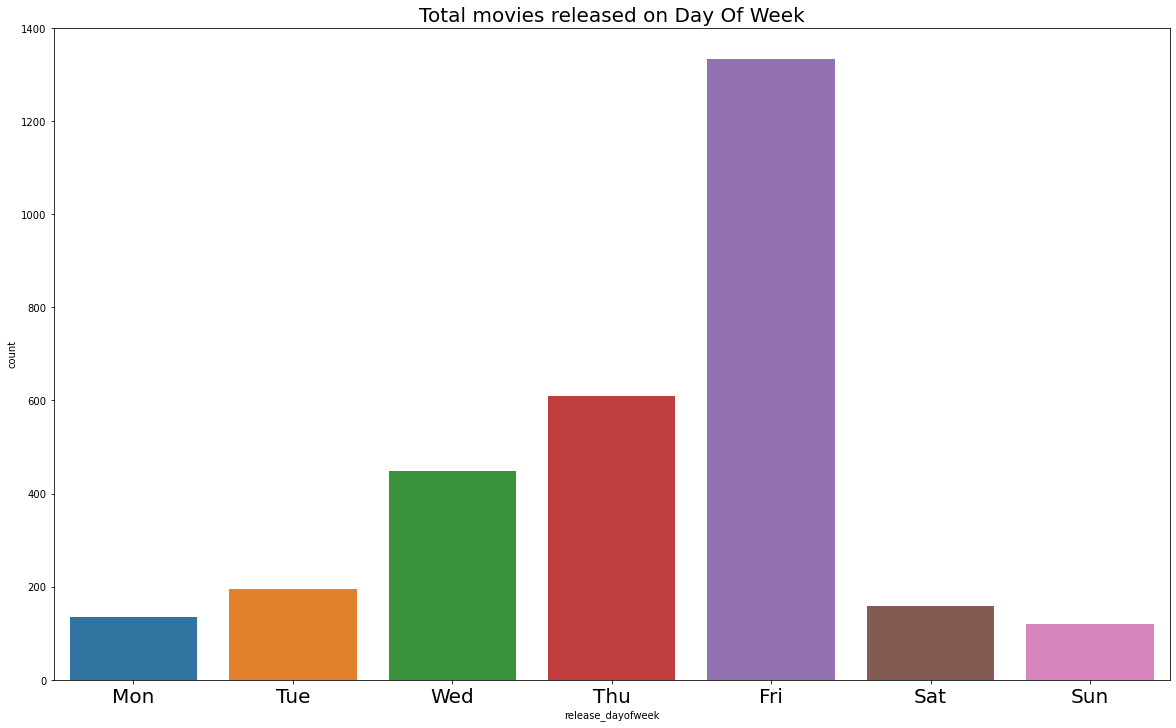

In [1685]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

A plot of release day of week

### Is the movie released?

In [1686]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In the train data is 2996 movies released, and 4 movies are yet to release.

In [1687]:
train.loc[train['status'] == "Rumored"][['status','revenue']]

,status,revenue
609,Rumored,273644
1007,Rumored,60
1216,Rumored,13418091
1618,Rumored,229000


This is strange, movie is yet to release and revenue is already given.

In [1688]:
test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In the test data is 4389 movies released, and 7 movies are yet to release.

### Test set

To split the train set and test set we use the train_test_split method, which will split the data set randomly in two parts.

In [1689]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [1690]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [1691]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [1692]:
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


Observation: many NaN

In [1693]:
len(test)

4398

# Handeling text

Most of the provided values are not numeric, therefore it is important to make all of the objects numeric

In [1694]:
X.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970


In [1695]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

X.cast= imputer.fit_transform(X["cast"].values.reshape(-1,1))[:,0]                                                                                 

In [1696]:
X.production_companies = imputer.fit_transform(X["production_companies"].values.reshape(-1,1))[:,0]

In [1697]:
X.production_countries = imputer.fit_transform(X["production_countries"].values.reshape(-1,1))[:,0]

In [1698]:
X.genres = imputer.fit_transform(X["genres"].values.reshape(-1,1))[:,0]

In [1699]:
X.spoken_languages = imputer.fit_transform(X["spoken_languages"].values.reshape(-1,1))[:,0]

In [1700]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3000 non-null   int64  
 1   genres                3000 non-null   object 
 2   imdb_id               3000 non-null   object 
 3   original_language     3000 non-null   object 
 4   original_title        3000 non-null   object 
 5   popularity            3000 non-null   float64
 6   production_companies  3000 non-null   object 
 7   production_countries  3000 non-null   object 
 8   release_date          3000 non-null   object 
 9   runtime               2998 non-null   float64
 10  spoken_languages      3000 non-null   object 
 11  status                3000 non-null   object 
 12  title                 3000 non-null   object 
 13  cast                  3000 non-null   object 
 14  revenue               3000 non-null   int64  
dtypes: float64(2), int64(

### Pipelines

In [1701]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [1702]:
X = X.drop([ "title", "imdb_id"], axis =1)

In [1703]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3000 non-null   int64  
 1   genres                3000 non-null   object 
 2   original_language     3000 non-null   object 
 3   original_title        3000 non-null   object 
 4   popularity            3000 non-null   float64
 5   production_companies  3000 non-null   object 
 6   production_countries  3000 non-null   object 
 7   release_date          3000 non-null   object 
 8   runtime               2998 non-null   float64
 9   spoken_languages      3000 non-null   object 
 10  status                3000 non-null   object 
 11  cast                  3000 non-null   object 
 12  revenue               3000 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 304.8+ KB


In [1704]:
X_test = X_test.drop(['belongs_to_collection', 'genres', 'homepage',
            'overview', 'poster_path','production_companies',
            'production_countries','runtime', 'spoken_languages',
            'tagline','Keywords','cast', 'crew',"status",
            "original_title", "title", "imdb_id", "release_date", "original_language"], axis=1)

In [1705]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      4398 non-null   int64  
 1   popularity  4398 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 68.8 KB


In [1706]:
X_numbers = X[['budget', 'popularity', 'runtime']]

num_pipeline = Pipeline([
                ['imputer', SimpleImputer(strategy="median")],
                ['std_scaler', StandardScaler() ],                       
  ])
X_numbers_tr = num_pipeline.fit_transform(X_numbers)
X_numbers_tr

array([[-0.23045256, -0.15599768, -0.6728692 ],
       [ 0.47187212, -0.01771439,  0.23310791],
       [-0.51948618,  4.61384865, -0.12928293],
       ...,
       [ 1.14718432,  0.49736238,  0.5501999 ],
       [ 0.5258971 ,  0.6000891 , -0.80876577],
       [ 0.33680969,  0.16929745, -0.08398408]])

In [1707]:
print(X.isnull().sum())

budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 2
spoken_languages        0
status                  0
cast                    0
revenue                 0
dtype: int64


In [1708]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      4398 non-null   int64  
 1   popularity  4398 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 68.8 KB


In [1709]:
X_cat = X[["genres", "original_language","original_title",
           "production_companies", "production_countries",
           "release_date","spoken_languages","status", 
            "cast"]]

X_cat_attribs = list(X_cat)
X_numbers_attribs = list(X_numbers)

full_pipeline = ColumnTransformer([
    ["num", num_pipeline,X_numbers_attribs],
    ["cat", OneHotEncoder(handle_unknown = 'ignore'), X_cat_attribs]
])

X_prepared = full_pipeline.fit_transform(X)

In [1744]:
X_prepared

<3000x12366 sparse matrix of type '<class 'numpy.float64'>'
	with 36000 stored elements in Compressed Sparse Row format>

# Select a model and train it

In [1710]:
#Making a function to display score value
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear regression model

In [1711]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [1712]:
y = train["revenue"].copy()
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

LinearRegression()

In [1713]:
revenue_predictions = lin_reg.predict(X_prepared)
lin_mse = mean_squared_error(y, revenue_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

100.65708470932597

In [1714]:
lin_scores = cross_val_score(lin_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [8.16255330e+07 8.54017063e+07 8.80809206e+07 8.70197172e+07
 7.77364670e+07 1.03630432e+08 6.81694366e+07 7.86796975e+07
 8.79236134e+07 8.51342058e+07]
Mean: 84340172.88945973
Standard deviation: 8674085.044058261


8.6 millions in standard deviation.

### Decision Tree Regressor

In [1715]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

In [1716]:
#Finding cross_val_score
scores = cross_val_score(tree_reg, 
                         X_prepared, 
                         y, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
tree_rmse_scores = np.sqrt(-scores)

#Prints the tree rmse scores
display_scores(tree_rmse_scores)

Scores: [1.12977581e+08 8.23409054e+07 1.26802529e+08 1.01810606e+08
 9.02746583e+07 1.06367662e+08 1.01595672e+08 1.10161736e+08
 9.24636713e+07 9.13827890e+07]
Mean: 101617780.93974584
Standard deviation: 12440787.446322743


13 millions in standard deviation.

### Random Forest

In [1717]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)

In [1718]:
#Finding cross-val-score
scores = cross_val_score(rf, X_prepared, y, 
                         scoring="neg_mean_squared_error", cv=10)
tree_mase_scores = np.sqrt(-scores)

In [1719]:
forest_xmae_scores = np.sqrt(-scores)
display_scores(forest_xmae_scores)

Scores: [8.04571365e+07 8.19692395e+07 1.04043554e+08 8.06275936e+07
 7.79504145e+07 9.69777815e+07 7.57974461e+07 9.04077120e+07
 8.90082635e+07 7.11405547e+07]
Mean: 84837969.54656358
Standard deviation: 9625903.077326715


9 millions in standard deviation.

In [1720]:
rf.fit(X_prepared, y)

RandomForestRegressor(n_estimators=10)

# Fine-tune our model

In [1751]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 
               'n_estimators': [3, 10], 
               'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) 
grid_search.fit(X_prepared, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [1747]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [1748]:
grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'